1: Dataset Preprocessing


Notebook 1: Dataset Preprocessing
- Step 0: Kaggle Setup & Drive Mount
- Step 1: Download PlantVillage Dataset
- Step 2: Unzip & Organize Dataset
- Step 3: Explore Raw Dataset Structure
- Step 4: Train/Validation/Test Split Creation
- Step 5: Image Preprocessing & Augmentation
- Step 6: Verify Class Counts
- Step 7: Visualize Sample Augmented Images


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 97% 635M/658M [00:06<00:00, 56.6MB/s]
100% 658M/658M [00:06<00:00, 104MB/s] 
plantvillage  PlantVillage
Found 33022 images belonging to 2 classes.
Found 8254 images belonging to 2 classes.


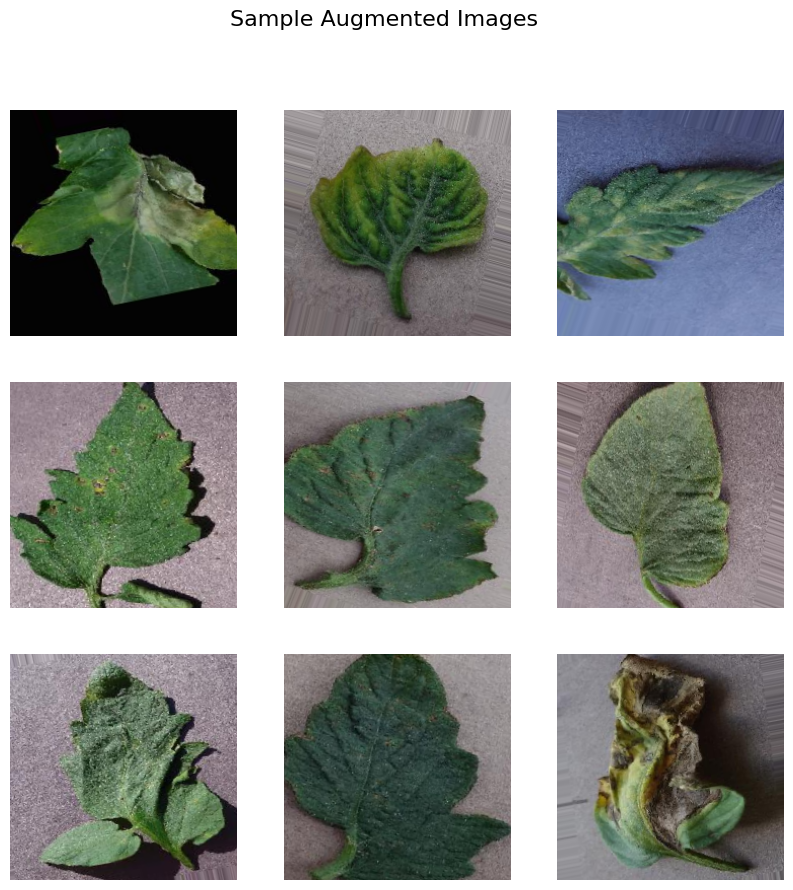

In [ ]:
# ================================
# Plant Disease Detection Project
# Notebook 1: Dataset Preprocessing
# Author: Sushma T
# ================================

# Step 0: Kaggle Setup (upload kaggle.json once)
from google.colab import files
files.upload()   # 👉 Upload kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 1: Download PlantVillage dataset from Kaggle
!kaggle datasets download -d emmarex/plantdisease

# Step 2: Unzip dataset into project folder
import zipfile

zip_path = "/content/plantdisease.zip"
extract_path = "/content/PlantDiseaseDetection/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

!ls /content/PlantDiseaseDetection/data

# Step 3: Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 4: Define dataset path
dataset_path = '/content/PlantDiseaseDetection/data'

# Step 5: Setup ImageDataGenerator for preprocessing + augmentation
img_size = (224, 224)   # ResNet50/EfficientNet standard input size
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    rotation_range=20,       # random rotations
    zoom_range=0.2,          # zoom in/out
    horizontal_flip=True,    # flip images
    validation_split=0.2     # split into train/validation
)

# Step 6: Create train and validation generators
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Step 7: Visualize some augmented images (to show preprocessing)
x_batch, y_batch = next(train_gen)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Sample Augmented Images", fontsize=16)
plt.show()

 organize the dataset into train/val/test folders.


Step 1: Inspect the Extracted Datase

In [ ]:
!ls /content/PlantDiseaseDetection/data

plantvillage  PlantVillage


Step 2: Create Train/Val/Test Splits

In [ ]:
!ls /content/PlantDiseaseDetection/split_data/train

ls: cannot access '/content/PlantDiseaseDetection/split_data/train': No such file or directory


In [ ]:
import os, shutil, random

# Path where your class folders are located
original_dataset = "/content/PlantDiseaseDetection/data/PlantVillage"
base_dir = "/content/PlantDiseaseDetection/split_data"

# Create train/val/test folders
for split in ['train', 'val', 'test']:
    split_path = os.path.join(base_dir, split)
    os.makedirs(split_path, exist_ok=True)

# Loop through each class folder
for class_name in os.listdir(original_dataset):
    class_path = os.path.join(original_dataset, class_name)
    if os.path.isdir(class_path):
        # Only take image files (ignore subdirectories)
        images = [f for f in os.listdir(class_path)
                  if os.path.isfile(os.path.join(class_path, f))]
        random.shuffle(images)

        # Split sizes
        train_size = int(0.7 * len(images))
        val_size = int(0.2 * len(images))

        train_imgs = images[:train_size]
        val_imgs = images[train_size:train_size+val_size]
        test_imgs = images[train_size+val_size:]

        # Create class subfolders inside train/val/test
        for split, split_imgs in zip(['train','val','test'], [train_imgs,val_imgs,test_imgs]):
            split_class_dir = os.path.join(base_dir, split, class_name)
            os.makedirs(split_class_dir, exist_ok=True)
            for img in split_imgs:
                src = os.path.join(class_path, img)
                dst = os.path.join(split_class_dir, img)
                shutil.copy(src, dst)

print("✅ Dataset split into train/val/test successfully!")

✅ Dataset split into train/val/test successfully!


In [ ]:
!ls /content/PlantDiseaseDetection/split_data/train

Pepper__bell___Bacterial_spot  Tomato_Late_blight
Pepper__bell___healthy	       Tomato_Leaf_Mold
Potato___Early_blight	       Tomato_Septoria_leaf_spot
Potato___healthy	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight	       Tomato__Target_Spot
Tomato_Bacterial_spot	       Tomato__Tomato_mosaic_virus
Tomato_Early_blight	       Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_healthy


Step3: Update Generators

In [ ]:
dataset_path = '/content/PlantDiseaseDetection/split_data'

train_gen = datagen.flow_from_directory(
    dataset_path + '/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    dataset_path + '/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    dataset_path + '/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14440 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Found 2076 images belonging to 15 classes.
